# Computational Physics
## The Logistic Map and the Route to Chaos

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Logistic_Bifurcation_map_High_Resolution.png/1920px-Logistic_Bifurcation_map_High_Resolution.png" width=600px>

## Last Time
### [Notebook Link: 17_ChaosPendulum](./17_ChaosPendulum.ipynb)
- driven dissipative pendulum
- determinental chaos
- Lyapunov exponents
- phase space trajectories


## Today

- Logistic map
- a simple route to chaotic behavior

### We would like to answer the questions:
* What does it take for a system to be chaotic?
* Can we predict ahead of time if a particular system will display chaotic behavior?

## Setting up the Notebook

In [103]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Chaos 
Aperiodic time-asymptotic behavior in a deterministic system which exhibits sensitive dependence on initial conditions.

1. **Aperiodic time-asymptotic behavior:** the existence of phase-space trajectories which do not settle down to fixed points or periodic orbits. For practical reasons, we insist that these trajectories are not too rare. We also require the trajectories to be bounded: i.e., they should not go off to infinity.
2. **Deterministic:** the equations of motion of the system possess no random inputs. In other words, the irregular behavior of the system arises from non-linear dynamics and not from noisy driving forces.
3. **Sensitive dependence on initial conditions:** nearby trajectories in phase-space separate exponentially fast in time: i.e., the system has a positive Lyapunov exponent.

## The logistic map

$$ x_{n+1} = \mu x_n (1 - x_n) $$

* map $\to$ discrete equation of motion
* A very simple iterative map that has applications in: ecology, statistics, neural networks, medicine.
* Think of $x_n$ as the size of a population in generation $n$, while $\mu$ is the availability of resources.

A study of this simple system will give us a more complete understanding of the origin of period doubling.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
Complete the function below which takes an array $x$ and paramter $\mu$ and returns the full solution of the Logistic Map.
</div>

<!--
    for n in range(x.size-1):
        x[n+1] = μ*x[n]*(1-x[n])
-->

In [104]:

def logistic_map(x,μ):
    '''Return the iterative logistic map.'''
    x = (μ*x*(1 - x))
    return x

def μ_lab(μ):
    return f'$\mu =  {μ:G}$'

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\corey\AppData\Local\Temp\ipykernel_29524\1084140455.py:7: SyntaxWarning: invalid escape sequence '\m'
  return f'$\mu =  {μ:G}$'


In [105]:
N = 100
μ = [1.5,3.3,3.8]
x = np.random.random(N)

Text(0.5, 0, 'n')

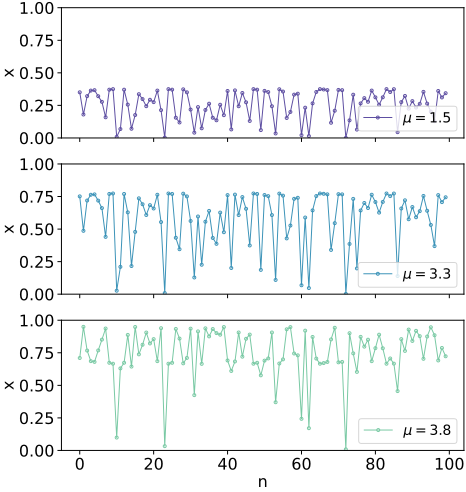

In [106]:
fig, axes = plt.subplots(3,1,sharex=True, sharey=True, squeeze=False, figsize=(7,8))
for i, ax in enumerate(axes.flat):
    # iterate the map
    x = logistic_map(x,μ[i])
    
    # plot the numerical results
    ax.plot(x,linestyle='-',marker='o',linewidth=1.0,markerfacecolor='None', 
            color=colors[i], markeredgecolor=colors[i], markersize=3, 
            label=μ_lab(μ[i]))
    ax.legend(loc='lower right', frameon=True)
    ax.set_ylabel('x')
    ax.set_ylim(0,1)

axes[-1,0].set_xlabel('n')

* For μ=1.5, we see simple convergent behavior.
* For μ=3.3, periodic behavior arises.
* For μ=3.8, non-periodic, chaotic behavior seems to occur.

Can understand the behavior for small $\mu$ by considering the continuous *Logistic function*: 
\begin{equation}
f(x,\mu) = \mu x (1-x).
\end{equation}
Then, for $\mu\sim 1$ $\exists$ a **fixed point** value $x^\ast$ such that:
\begin{equation}
f(x^\ast,\mu) = x^\ast.
\end{equation}

### Can we determine $x^\ast$?

\begin{align}
x^\ast &= \mu x^\ast (1-x^\ast) \newline
x^\ast [ \mu x^\ast + 1 - \mu] &= 0 \newline
\Rightarrow x^\ast &= 0, 1-\frac{1}{\mu}.
\end{align}

We thus have two fixed points, corresponding to the two values of x*. Generically we can iteratively or graphically solve.  Let's test our non-zero solution:

### Iterate until we find the fixed point

<div class="span alert alert-success">
<h2> Group Programming challenge </h2>
Complete the code below which identifies the fixed point via brute force iteration.
</div>

<!--
n = 0
while np.abs(x[-1]-x[-2]) > 1.0E-6 and n < 200:
    x.append(cμ*x[-1]*(1-x[-1]))
    n += 1
-->

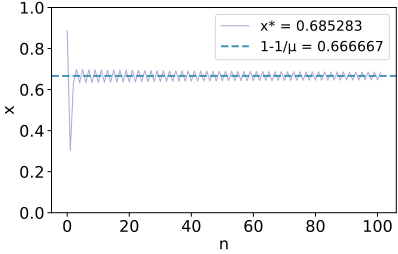

In [ ]:
x = [np.random.random()]
cμ = 3

# the first iteration
x.append(cμ*x[0]*(1-x[0]))

# continue until we find a fixed point
# INSERT CODE HERE
N = 100
for n in range(N):
    x.append(cμ*x[-1]*(1-x[-1]))

plt.plot(x, color=colors[0],label=f'x* = {x[-1]:G}', linewidth=1, alpha=0.5)
plt.axhline(y=(1.0-1.0/cμ), color=colors[1], linestyle='--', label=f'1-1/μ = {1-1/cμ:G}')
plt.ylim(0,1)
plt.xlabel('n')
plt.ylabel('x')
plt.legend(frameon=True)

### A graphical solution
Plot $x_n$ vs $x_{n+1}$

Text(0, 0.5, '$x_{n+1}$')

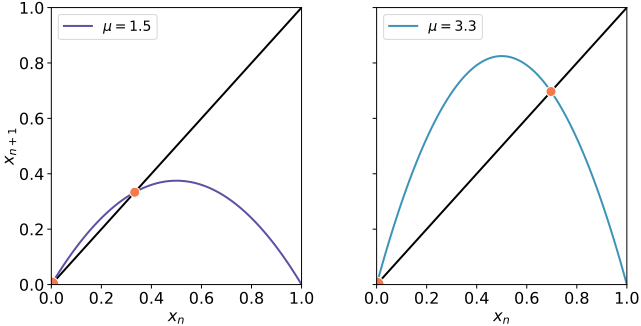

In [108]:
μ = [1.5,3.3]
x = np.arange(0,1.01,0.01)
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=False, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)
for i, ax in enumerate(axes.flat):
    
    # plot x
    ax.plot(x,x,color='k')
    
    # plot f(x,μ)
    ax.plot(x,μ[i]*x*(1-x),color=colors[i], label=μ_lab(μ[i]))
    
    # plot the fixed point solutions
    ax.plot(0,0,'o',markersize=15, markerfacecolor=colors[-3], markeredgecolor='w')
    ax.plot(1-1/μ[i],1-1/μ[i],'o',markersize=10, markerfacecolor=colors[-3], markeredgecolor='w')
            
    ax.legend(loc='upper left', frameon=True)
    ax.set_xlabel(r'$x_n$')
    
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
axes[0,0].set_ylabel(r'$x_{n+1}$')

In order to understand the differences between these two maps, let us investigate the logistic function near the fixed points:

\begin{equation}
f(x^\ast + \delta x,\mu) \approx f(x^\ast,\mu) + \frac{d}{d x}f(x^\ast,\mu) \delta x.
\end{equation}

From this expansion, we can see that the **stability** of a fixed point is related to the magnitude of the first derivative of the $f$, i.e. 

\begin{align}
|f'(x^\ast,\mu)| < 1 &\Rightarrow \mathrm{ stable} \newline
|f'(x^\ast,\mu)| > 1 &\Rightarrow \mathrm{ unstable} .
\end{align}

We can check this explicitely:

\begin{align}
\frac{d}{dx} f(x,\mu) &= \frac{d}{d x} [ \mu x (1-x) ] \newline
&= \mu(1-x) - \mu x \newline
&= \mu(1-2x) .
\end{align}

Evaluating at the fixed points:

### 1. $x^\ast = 0$
\begin{equation}
f'(x^\ast = 0) = \mu
\end{equation}
which is stable for $\mu < 1$.

### 2. $x^\ast = 1-1/\mu$
\begin{align}
f'(x^\ast = 1-1/\mu) &= \mu(1-2 + 2/\mu) \newline
&= 2 -\mu
\end{align}
which is stable for:
\begin{align}
|2-\mu| &< 1 \newline 
-1 &> 2-\mu < 1 \newline 
1 &< \mu < 3 .
\end{align}



(0.0, 1.0)

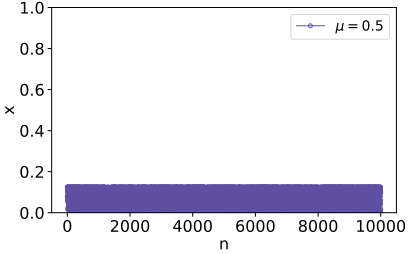

In [109]:
x = np.random.random(100*N)
cμ = 0.5

# iterate the map
x = logistic_map(x,cμ)

# plot the numerical results
plt.plot(x,linestyle='-',marker='o',linewidth=1.0,markerfacecolor='None', 
        color=colors[0], markeredgecolor=colors[0], markersize=4, 
        label=μ_lab(cμ))
plt.legend(loc='upper right', frameon=True)
plt.xlabel('n')
plt.ylabel('x')
plt.ylim(0,1)

## Phase Space Plots
We can observe these instabilities directly on the map equivalent of a phase space

Text(0, 0.5, '$x_{n+1}$')

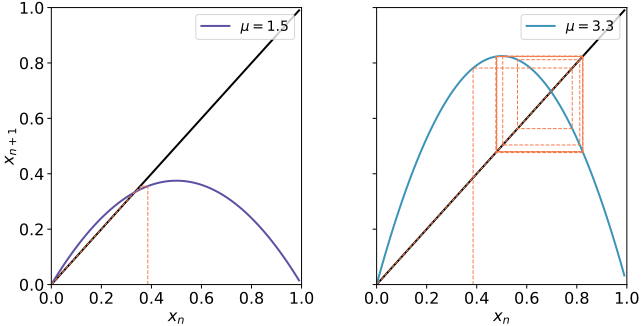

In [110]:
def logistic(mu,x):
    '''Return the logistic functon'''
    return mu*x*(1.0-x)

μ = [1.5,3.3]
x = np.arange(0,1,0.01)
xp = np.zeros([N,2])
xp[0,0] = np.random.random()
xp[0,1] = 0.0

fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=False, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)
for i, ax in enumerate(axes.flat):
    # plot x
    ax.plot(x,x,color='k')

    # plot f(x,μ)
    ax.plot(x,μ[i]*x*(1-x),color=colors[i], label=μ_lab(μ[i]))

    # compute the trajectories
    for n in range(1,N-1,2):
        xp[n,0] = xp[n-1,0]
        xp[n,1] = logistic(μ[i],xp[n-1,0])
        xp[n+1,0] = xp[n,1]
        xp[n+1,1] = xp[n,1]

    ax.plot(xp[:,0],xp[:,1],'--',color=colors[-3],linewidth=1)

    # legend and labels
    ax.legend(loc='upper right', frameon=True)
    ax.set_xlabel(r'$x_n$')
    
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    
axes[0,0].set_ylabel(r'$x_{n+1}$')

The unstable fixed point shows evidence of oscillations.  Can understand this and its connection to period doubling by looking at the second iteratue of $f(x,\mu)$, i.e. how does $x_{n+2}$ depend on $x_n$

\begin{equation}
f^{(2)}(x,\mu) = f(f(x,\mu),\mu)
\end{equation}

or in terms of the Logistic map:

\begin{align}
x_{n+2} &= \mu x_{n+1}(1-x_{n+1}) \newline
&= \mu[\mu x_n(1-x_n)][1-\mu x_n(1-x_n)]
\end{align}

A fixed point solution of this equation exists, but is quite complicated.

<div class="span alert alert-success">
<h2> Group Programming challenge </h2>
Find a graphical solution to the second iterate of the Logistic map and plot for $\mu=1.5,3.3$.
</div>

<!--
 # INSERT CODE HERE
    fx = μ[i]*x*(1-x)
    
    # plot f(f(x,μ),μ)
    ax.plot(x,μ[i]*fx*(1-fx),color=colors[i], label=μ_lab(μ[i]))
-->

C:\Users\corey\AppData\Local\Temp\ipykernel_29524\3705592151.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', frameon=True)


(0.0, 1.0)

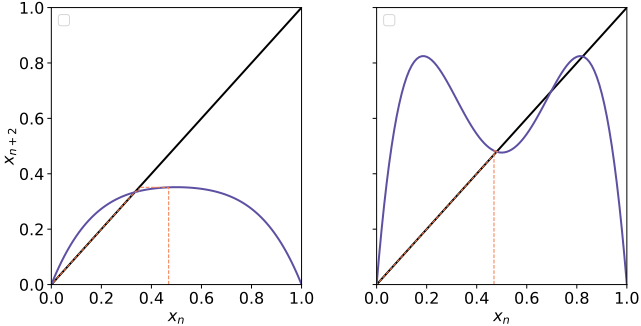

In [114]:
μ = [1.5,3.3]
x = np.arange(0,1.01,0.01)
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=False, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)
xp = np.zeros([N,2])
xp[0,0] = np.random.random()
xp[0,1] = 0.0
#print(xp)
for i, ax in enumerate(axes.flat):
    
    # plot x
    ax.plot(x,x,color='k')

    # INSERT CODE HERE
    def logistic(μ,x):
        return logistic_map(logistic_map(x,μ),μ)
    ax.plot(x,logistic(μ[i],x))

    # compute the trajectories
    for n in range(1,N-1,2):
        xp[n,0] = xp[n-1,0]
        xp[n,1] = logistic(μ[i],xp[n-1,0])
        xp[n+1,0] = xp[n,1]
        xp[n+1,1] = xp[n,1]

    ax.plot(xp[:,0],xp[:,1],'--',color=colors[-3],linewidth=1)            
    ax.legend(loc='upper left', frameon=True)
    
axes[0,0].set_ylabel(r'$x_{n+2}$')
[axes[0,i].set_xlabel(r'$x_n$') for i in range(2)]
axes[0,0].set_ylim(0,1)
axes[0,0].set_xlim(0,1)

## Summary

* We now get a feeling for why period doubling happens, the number of fixed points is increasing with μ!
* Also, we might expect many dynamical systems to have smooth Taylor expansions near their fixed points that have the same fundamental properties as the logistic map.  This is the origin of universality and the Feigenbaum-δ for deterministic chaos via period doubling.